## Análisis de Datos del Titanic
### Un enfoque completo para el análisis de datos con Python y Pandas

Este documento en Jupyter Notebook te guiará a través de un análisis completo del famoso dataset del Titanic de Kaggle. El objetivo es predecir la supervivencia de los pasajeros utilizando varias técnicas de análisis de datos y aprendizaje automático.

**Tabla de Contenido**

1. Definición del problema

2. Recopilación de Datos

3. Exploración de Datos

4. Limpieza de Datos

5. Análisis de datos

6. Interpretación de resultados
8. Comunicación de hallazgos


1. #### **Definición del problema**

El hundimiento del RMS Titanic es uno de los naufragios más infames de la historia. En este proyecto, analizaremos el dataset del Titanic de Kaggle para entender qué factores influyeron en la supervivencia de los pasajeros. Este análisis nos permitirá construir un modelo predictivo que pueda predecir la supervivencia de un pasajero basándonos en sus características.

2. #### **Recopilación de Datos**

El dataset del Titanic está disponible en Kaggle:

`Titanic-Dataset.csv`: Contiene los datos de pasajeros del titanic, incluyendo la variable objetivo `Survived`.

Importaremos las bibliotecas necesarias y cargaremos los datos en DataFrames de Pandas.

In [1]:
# Si no existe estas librerias, se pueden instalar con la siguiente línea
!pip3 install pandas numpy matplotlib seaborn

### Descripción de la data
| Columna       | Descripción                                                  |
| :------------ | :----------------------------------------------------------- |
| PassengerId   | ID del Pasajero                                                |
| Survived      | Si sobrevivió o no: 0 = No, 1 = Sí                             |
| Pclass        | Clase del boleto: 1 = 1ra, 2 = 2da, 3 = 3ra                   |
| Name          | Nombre del Pasajero                                            |
| Sex           | Género                                                       |
| Age           | Edad en años                                                   |
| SibSp         | Número de hermanos/cónyuges a bordo del Titanic                  |
| Parch         | Número de padres/hijos a bordo del Titanic                       |
| Ticket        | Número de boleto                                               |
| Fare          | Tarifa del pasajero                                              |

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
import requests

# Ruta  para almacenar los scripts python a nuestro drive
code_dir = "/content/drive/MyDrive/ColabNotebooks/BigData/practica_BigData/"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic_data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/BigData/practica_BigData/data/Titanic-Dataset.csv')

3. #### **Exploración de Datos**
El Análisis Exploratorio de Datos (EDA) es un paso crucial en cualquier proyecto de análisis de datos. Nos ayuda a entender las características del dataset, identificar patrones y relaciones, y obtener información valiosa para la ingeniería de características y la selección de modelos.

##### **3.1 Descripción del Dataset**
Primero, echaremos un vistazo a las primeras filas del dataset, los tipos de datos de las columnas y las estadísticas descriptivas.

In [5]:
# Mostrar las primeras filas del dataset
print(titanic_data.head())

# Mostrar información sobre las columnas y sus tipos de datos
print(titanic_data.info())

# Mostrar estadísticas descriptivas de las columnas numéricas
print(titanic_data.describe())

# Mostrar estadísticas descriptivas de las columnas categóricas
print(titanic_data.describe(include=['O']))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

##### **3.2 Visualización de Datos**
Visualizaremos la distribución de las variables y las relaciones entre ellas utilizando varias técnicas de visualización.

- Variable Objetivo (`Survived`): Visualizaremos la distribución de la variable objetivo para entender el equilibrio de clases.

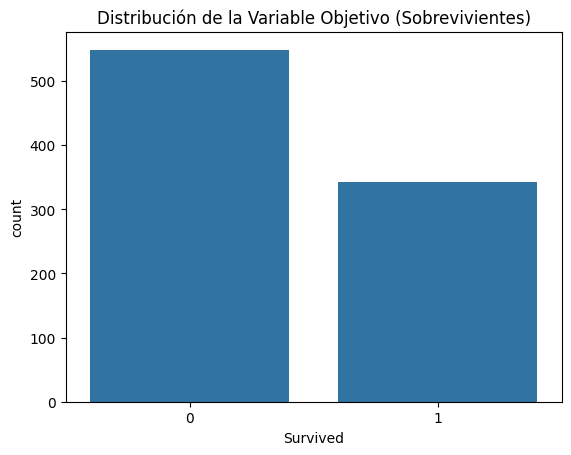

In [ ]:
# Visualizar la distribución de la variable objetivo
sns.countplot(x='Survived', data=titanic_data)
plt.title('Distribución de la Variable Objetivo (Sobrevivientes)')
plt.show()

- **Variables Categóricas**: Visualizaremos la relación entre las variables categóricas (por ejemplo, `Sex`, `Pclass`, `Embarked`) y la variable objetivo utilizando gráficos de barras apiladas o gráficos de barras agrupadas.

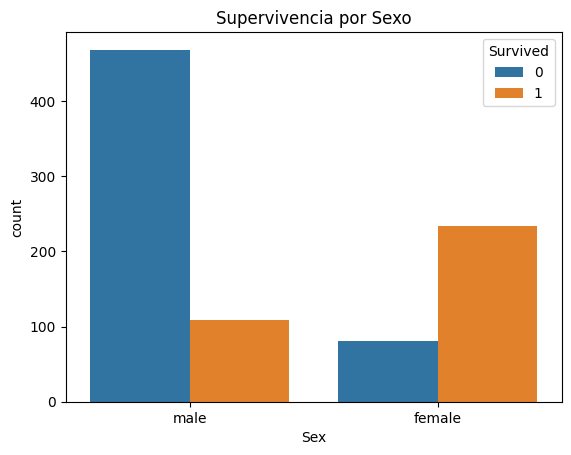

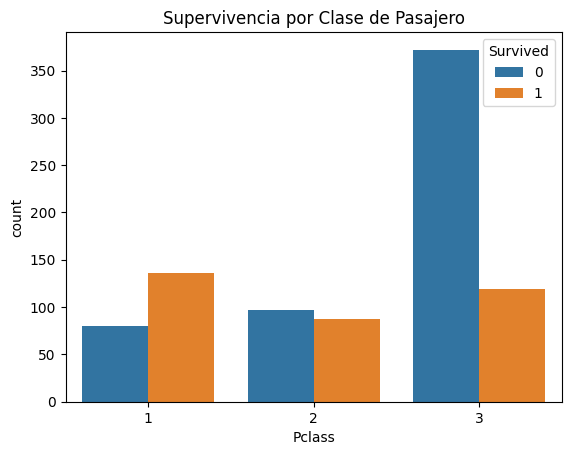

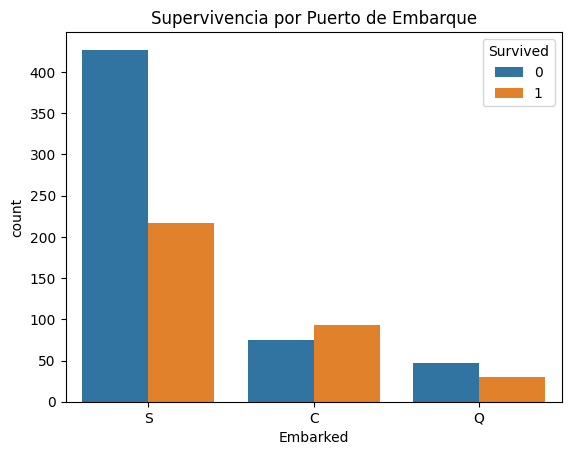

In [ ]:
# Visualizar la relación entre el sexo y la supervivencia
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title('Supervivencia por Sexo')
plt.show()

# Visualizar la relación entre la clase del pasajero y la supervivencia
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Supervivencia por Clase de Pasajero')
plt.show()

# Visualizar la relación entre el puerto de embarque y la supervivencia
sns.countplot(x='Embarked', hue='Survived', data=titanic_data)
plt.title('Supervivencia por Puerto de Embarque')
plt.show()

- **Variables Numéricas**: Visualizaremos la distribución de las variables numéricas (por ejemplo, `Age`, `Fare`) y su relación con la variable objetivo utilizando histogramas, diagramas de caja o diagramas de violín.

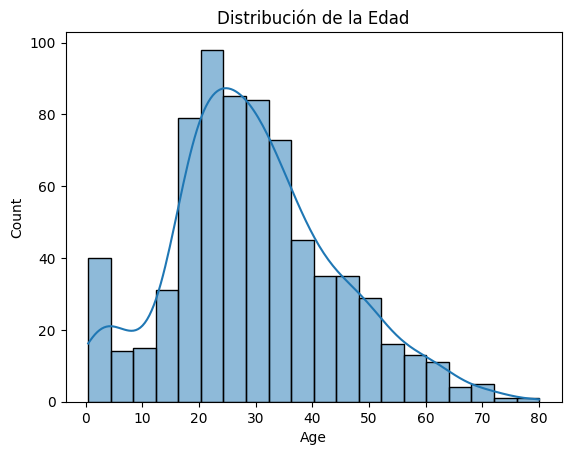

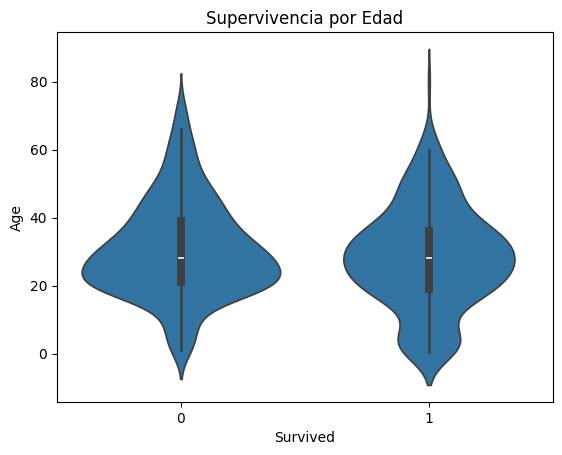

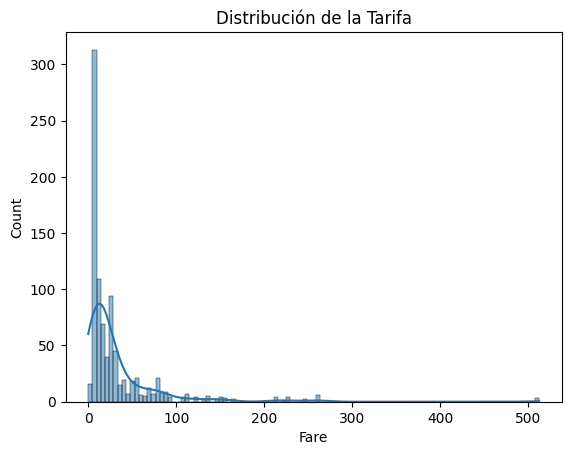

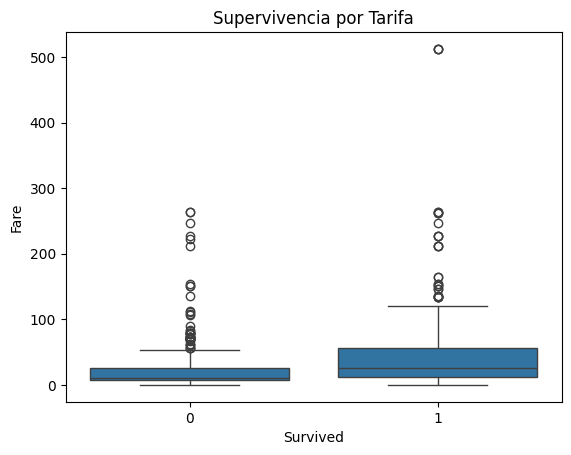

In [ ]:
# Visualizar la distribución de la edad
sns.histplot(x='Age', data=titanic_data, kde=True)
plt.title('Distribución de la Edad')
plt.show()

# Visualizar la relación entre la edad y la supervivencia
sns.violinplot(x='Survived', y='Age', data=titanic_data)
plt.title('Supervivencia por Edad')
plt.show()

# Visualizar la distribución de la tarifa
sns.histplot(x='Fare', data=titanic_data, kde=True)
plt.title('Distribución de la Tarifa')
plt.show()

# Visualizar la relación entre la tarifa y la supervivencia
sns.boxplot(x='Survived', y='Fare', data=titanic_data)
plt.title('Supervivencia por Tarifa')
plt.show()

- **Correlación**: Visualizaremos la correlación entre las variables numéricas utilizando un mapa de calor.

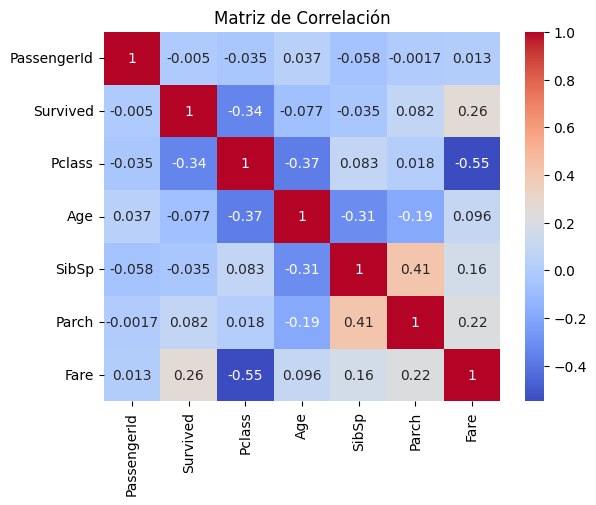

In [ ]:
# Calcular la matriz de correlación
corr_matrix = titanic_data[['PassengerId', 'Survived', 'Pclass', 'Age','SibSp','Parch','Fare']].corr()

# Visualizar la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

4. #### **Limpieza de Datos**
La limpieza de datos es el proceso de manejar los datos faltantes, eliminar duplicados y corregir errores en el dataset. Es un paso esencial para asegurar la calidad de los datos y la precisión del modelo.

#### **4.1 Valores Faltantes**
Identificaremos las columnas con valores faltantes y decidiremos cómo imputarlos.

In [ ]:
# Identificar columnas con valores faltantes
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


`Age`: Imputaremos los valores faltantes en la columna `Age` utilizando la mediana, ya que es menos sensible a los valores atípicos.

In [ ]:
# Imputar valores faltantes en la columna `Age`
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

`Fare`: Imputaremos los valores faltantes en la columna `Fare` utilizando la mediana.

In [ ]:
# Imputar valores faltantes en la columna `Fare`
titanic_data['Fare'] = titanic_data['Fare'].fillna(titanic_data['Fare'].median())

- `Embarked`: Imputaremos los valores faltantes en la columna `Embarked` utilizando el valor más frecuente.

In [ ]:
# Imputar valores faltantes en la columna `Embarked`
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

- `Cabin`: Debido a la gran cantidad de valores faltantes, eliminaremos la columna `Cabin`.

In [ ]:
# Eliminar la columna `Cabin`
titanic_data = titanic_data.drop('Cabin', axis=1)

##### **4.2 Valores Duplicados**
Identificaremos y eliminaremos cualquier fila duplicada en el dataset.

In [ ]:
# Identificar y eliminar filas duplicadas
print("Número de filas duplicadas antes de eliminar:", titanic_data.duplicated().sum())
titanic_data = titanic_data.drop_duplicates()
print("Número de filas duplicadas después de eliminar:", titanic_data.duplicated().sum())

Número de filas duplicadas antes de eliminar: 0
Número de filas duplicadas después de eliminar: 0


5.  ###   Análisis de Datos

* **Estadísticas Descriptivas**

    * Columnas Numéricas:
        * La edad promedio de los pasajeros es aproximadamente 29.7 años, con una desviación estándar de 14.5, lo que indica una variabilidad considerable en las edades.

        * Las tarifas de los pasajeros varían ampliamente, desde 0 hasta 512.3292, con una tarifa promedio de 32.2042 y una desviación estándar de 49.693429, lo que sugiere una dispersión significativa.

        * La tasa de supervivencia es de aproximadamente el 38%, lo que significa que solo el 38% de los pasajeros sobrevivió.

    * Columnas Categóricas:
        * El género más frecuente es el masculino, con 577 ocurrencias.

        * El número de boleto más frecuente es "347082", y la cabina más frecuente es "B96 B98".

        * El puerto de embarque más frecuente es "S" (Southampton), con 644 pasajeros embarcando desde este puerto.

* Análisis de Correlación
    * La matriz de correlación revela algunas relaciones interesantes:
        * `Pclass` y `Fare` están negativamente correlacionadas (-0.55), lo que indica que las clases de boleto más altas (1ra clase) generalmente corresponden a tarifas más altas.

        * `Survived` y `Fare` tienen una correlación positiva débil (0.26), lo que sugiere que los pasajeros con tarifas más altas tenían una ligera mayor probabilidad de sobrevivir.

        * `Age` y `Pclass` están negativamente correlacionadas (-0.37), lo que indica que los pasajeros mayores tenían más probabilidades de estar en clases de boleto más altas.
        
        * `SibSp` y `Parch` están positivamente correlacionadas (0.41), lo que sugiere que los pasajeros con más hermanos/cónyuges también tienden a tener más padres/hijos.

    ---

    **Pie de Página:**

    * **Desviación Estándar:** Medida que cuantifica la dispersión o variabilidad de un conjunto de valores respecto a su media. Una desviación estándar alta indica que los valores están muy dispersos, mientras que una desviación estándar baja indica que están más agrupados cerca de la media.

6. ### Interpretación de Resultados

- Las estadísticas descriptivas proporcionan una visión general del conjunto de datos. La variabilidad en `Age` y `Fare` sugiere que estos factores podrían desempeñar un papel en la supervivencia, pero su impacto necesita una mayor investigación.

- El análisis de datos categóricos muestra que la mayoría de los pasajeros son de género **masculino** y embarcaron desde **Southampton**. Esto podría implicar que el género y el puerto de embarque son factores significativos en el análisis.

- La tasa de supervivencia del **38%** indica que menos de la mitad de los pasajeros sobrevivió, lo que destaca la gravedad del desastre.

- El análisis de correlación proporciona información sobre las posibles relaciones entre las variables. Por ejemplo, la correlación negativa entre Pclass y Age podría sugerir que los pasajeros mayores tenían más probabilidades de permitirse boletos de clase alta, lo que también podría estar relacionado con las tasas de supervivencia.

8. ### Comunicación de Hallazgos

#### Conclusiones Clave

1. Tasa de Supervivencia: Solo el 38% de los pasajeros sobrevivió.

2. Distribución de Edades: La edad promedio es de alrededor de 30 años, con una variabilidad significativa.

3. Variabilidad de Tarifas: Las tarifas varían ampliamente, lo que indica diferencias socioeconómicas entre los pasajeros.

4. Disparidad de Género: La mayoría de los pasajeros son de género masculino.

5. Puerto de Embarque: La mayoría de los pasajeros embarcaron desde Southampton.

6. Clase y Tarifa: Las clases de boleto más altas están asociadas con tarifas más altas.

In [ ]:
!python3 --version

Python 3.11.12
